## **Serialization**

In Django REST Framework (DRF), serialization is the process of converting complex data types (such as Django models or Python objects) into JSON (or other formats) that can be sent over an API. Similarly, it can be used to parse incoming data (e.g., JSON) and convert it back into complex Python objects.

Serialization in Django REST Framework (DRF) is the process of converting complex data types like Django model instances into native Python data types (e.g., dictionaries), which can then be easily rendered into formats like JSON or XML for APIs. It also works in reverse, enabling the conversion of parsed data (e.g., JSON) back into complex Python objects.

Serialization is a critical feature in REST APIs, as it facilitates the communication between the backend (Django) and clients (e.g., React, Angular, mobile apps).



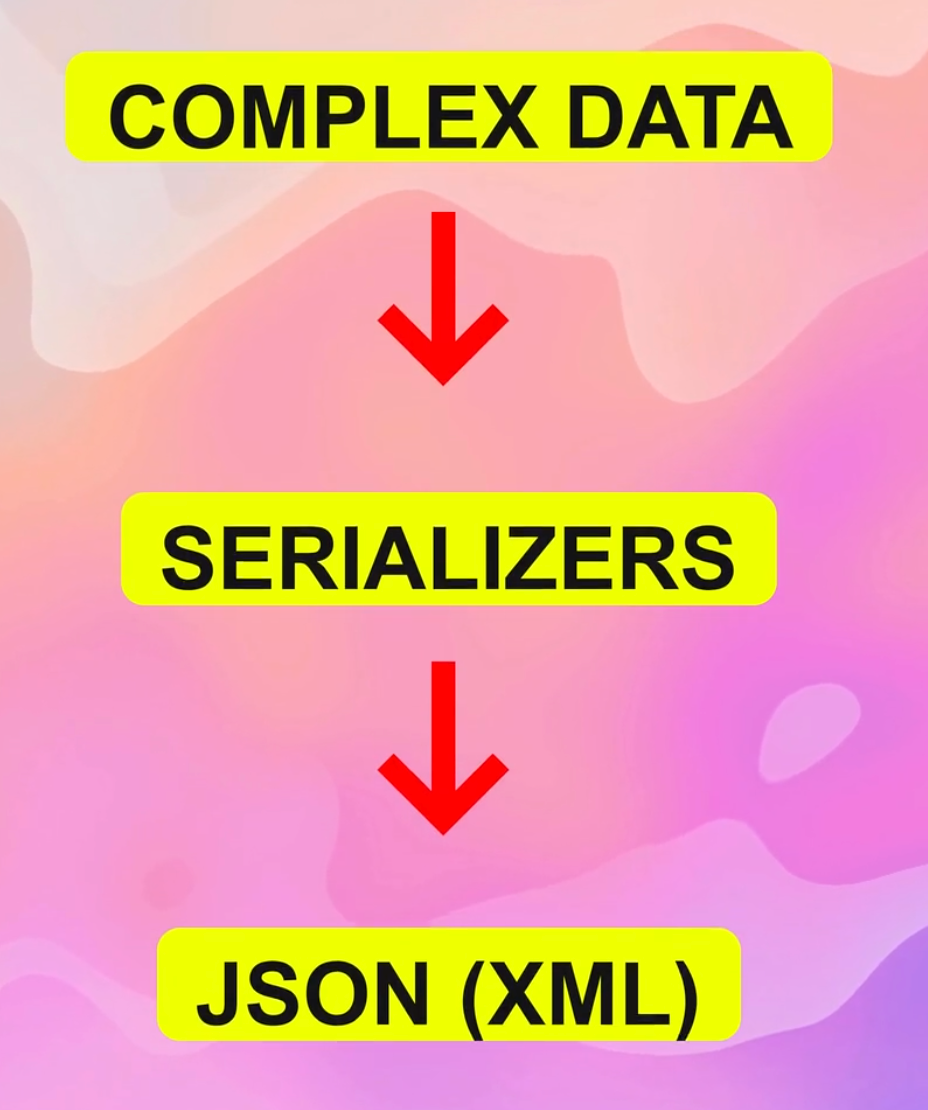

## **Deserialization**

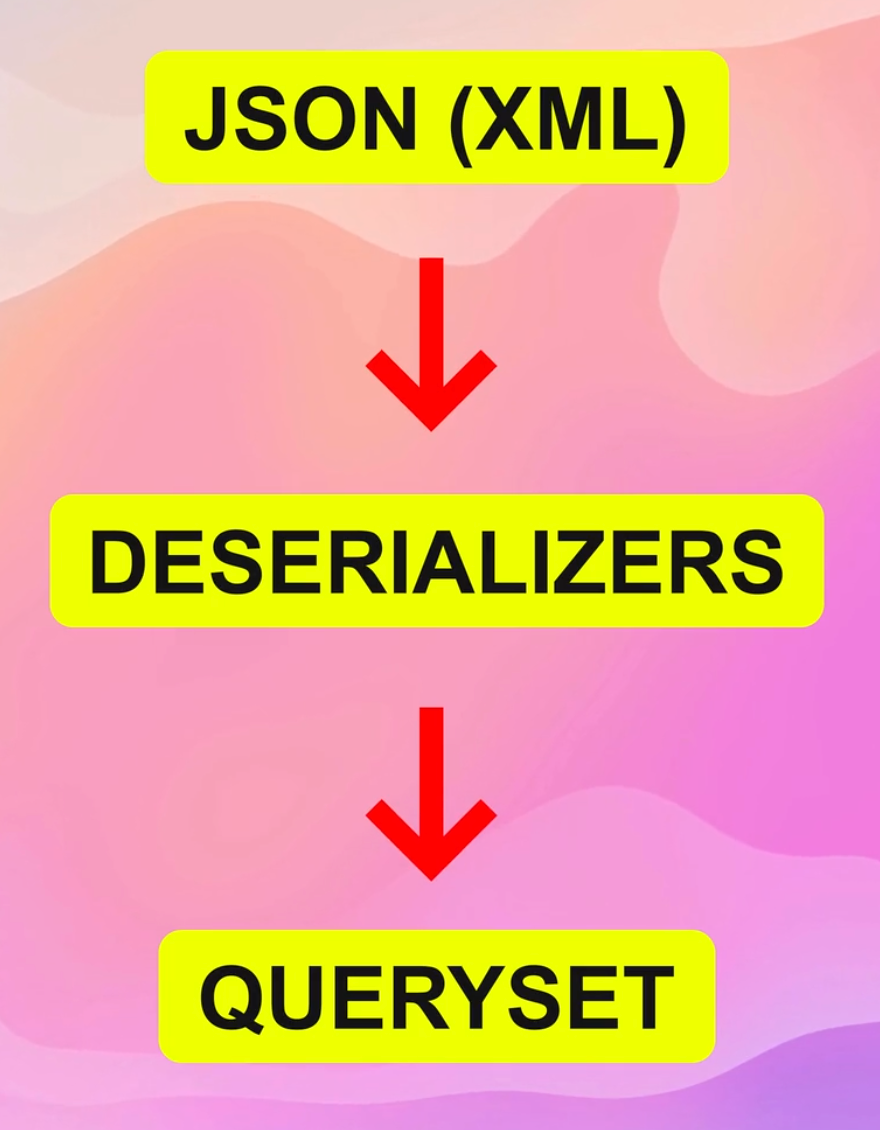



### **Why Use Serialization?**
APIs typically deal with data in a standardized format (e.g., JSON or XML). Serialization bridges the gap between the database objects (models) and the external representation required by APIs.

Data Transformation: Converts model instances or querysets into a format suitable for APIs.

Validation: Validates incoming data before saving it to the database.

Customization: Allows customizing how data is exposed in the API.



### **Types of Serialization**
#### **Model Serialization:**
1. Handles Django model instances.
2. Simplifies the process of converting models to JSON and vice versa.

#### **Custom Serialization:**
1. Handles non-model or custom data structures.
2. Offers flexibility when dealing with non-standard inputs or outputs.

### **Serialization Workflow**
#### Serialization (from object to JSON):
Convert Django models or Python objects into JSON to send as an API response.

#### Deserialization (from JSON to object):
Parse incoming JSON data and validate it to create Python objects or save them to the database.

### **Example: Serialization in Django REST Framework**

#### 1. **Basic Serializer**
A basic serializer can be written to convert a model to JSON and vice versa.

#### Step-by-Step Implementation

1. **Define a Model**:
```python
from django.db import models

class Note(models.Model):
    title = models.CharField(max_length=100)
    content = models.TextField()
    created_at = models.DateTimeField(auto_now_add=True)
```

2. **Create a Serializer**:
The serializer defines how the model fields are converted to JSON and validated.

```python
from rest_framework import serializers
from .models import Note

class NoteSerializer(serializers.ModelSerializer):
    class Meta:
        model = Note
        fields = ['id', 'title', 'content', 'created_at']
```

Here:
- **`ModelSerializer`**: Automatically handles the mapping between the model and its fields.
- **`fields`**: Specifies which fields should be included in the API.

3. **Write a View**:
The view will use the serializer to handle incoming and outgoing data.

```python
from rest_framework.decorators import api_view
from rest_framework.response import Response
from .models import Note
from .serializers import NoteSerializer

@api_view(['GET', 'POST'])
def notes_view(request):
    if request.method == 'GET':
        notes = Note.objects.all()
        serializer = NoteSerializer(notes, many=True)
        return Response(serializer.data)

    if request.method == 'POST':
        serializer = NoteSerializer(data=request.data)
        if serializer.is_valid():
            serializer.save()
            return Response(serializer.data, status=201)
        return Response(serializer.errors, status=400)
```

- **GET Request**: Fetches all notes and serializes them into JSON.
- **POST Request**: Deserializes JSON data, validates it, and saves it to the database.

4. **Set up URLs**:
```python
from django.urls import path
from .views import notes_view

urlpatterns = [
    path('api/notes/', notes_view, name='notes'),
]
```

---

#### 2. **Custom Serializer**
You can customize serializers to include additional logic or computed fields.

```python
from rest_framework import serializers
from .models import Note

class CustomNoteSerializer(serializers.ModelSerializer):
    word_count = serializers.SerializerMethodField()

    class Meta:
        model = Note
        fields = ['id', 'title', 'content', 'word_count', 'created_at']

    def get_word_count(self, obj):
        return len(obj.content.split())
```

This adds a `word_count` field that calculates the number of words in the content dynamically.

---

### **Key Serializer Methods**
1. **`to_representation(self, instance)`**:
   - Customize how data is converted into JSON.
2. **`create(self, validated_data)`**:
   - Define how new instances are created when deserializing data.
3. **`update(self, instance, validated_data)`**:
   - Define how existing instances are updated.

---

### **Output Example**

#### GET Request
URL: `/api/notes/`

Response:
```json
[
    {
        "id": 1,
        "title": "Meeting Notes",
        "content": "Discuss project updates.",
        "created_at": "2024-12-29T12:00:00Z"
    },
    {
        "id": 2,
        "title": "Shopping List",
        "content": "Milk, eggs, bread.",
        "created_at": "2024-12-29T12:05:00Z"
    }
]
```

#### POST Request
Request Body:
```json
{
    "title": "Workout Plan",
    "content": "Pushups, squats, running."
}
```

Response:
```json
{
    "id": 3,
    "title": "Workout Plan",
    "content": "Pushups, squats, running.",
    "created_at": "2024-12-29T12:10:00Z"
}
```

---

### Summary
- **Serialization** bridges the gap between Django models and API-friendly data formats.
- DRF provides powerful tools like `ModelSerializer` for automatic field mapping and validation.
- With custom serializers, you can add calculated fields or complex validation logic.